<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Rolling Statistics


# Independent Practice

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `datetime` index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
unemp = pd.read_csv('./data/unemployment.csv')
unemp.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [3]:
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%
174,Seasonally adjusted quarterly U.S. unemploymen...,NaN


In [4]:
unemp.columns = ['year_quarter', 'unemployment_rate']
unemp['unemployment_rate'] = unemp['unemployment_rate'].map(lambda x: float(str(x).replace('%','')))
unemp.dropna(inplace=True)

In [5]:
unemp.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [7]:
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [8]:
# This is quarterly data, so converting to datetime is a bit complicated. .dt.to_period('Q') will help us represent the string as a datetime object.
unemp['date'] = pd.to_datetime(unemp.year_quarter).dt.to_period('Q')
unemp.set_index('date', inplace=True)
unemp.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


### 2) Plot the unemployment rate.

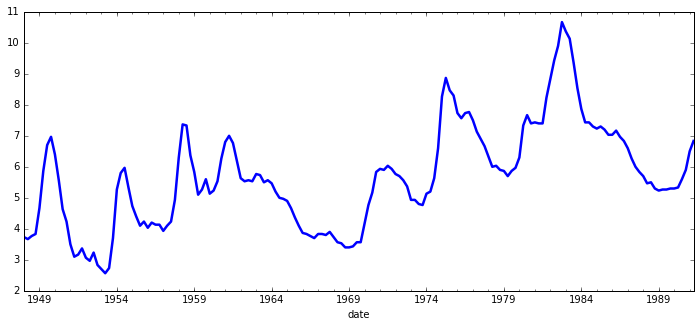

In [9]:
unemp['unemployment_rate'].plot(lw=2.5, figsize=(12,5))

### 3) Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.

In [10]:
yearly = unemp['unemployment_rate'].resample('A').mean().rolling(window=3, center=False).mean()
yearly.head()

date
1948         NaN
1949         NaN
1950    5.002833
1951    4.847333
1952    3.838917
Freq: A-DEC, Name: unemployment_rate, dtype: float64

In [12]:
# Extract the dates from the index as timestamps.
date_ticks_orig = unemp.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

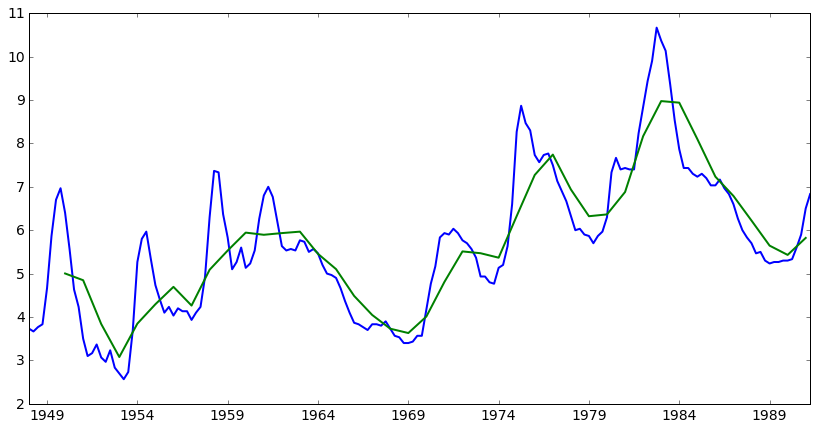

In [14]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, unemp.unemployment_rate.values,lw=2)
plt.plot(date_ticks_roll, yearly.values, lw=2)

plt.tick_params(labelsize=14)

### 4) Calculate the rolling median with `window=5` and `window=15`. Plot both together with the original data.

In [16]:
uroll_w5 = unemp.unemployment_rate.rolling(window=5).median()
uroll_w15 = unemp.unemployment_rate.rolling(window=15).median()

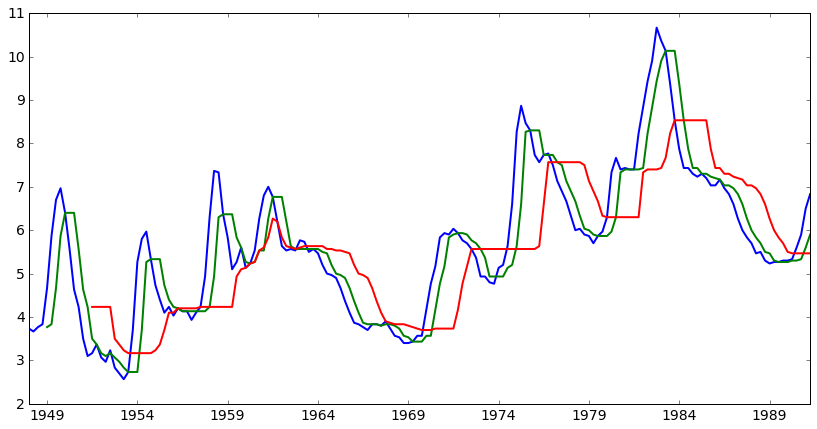

In [17]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks_orig, unemp.unemployment_rate.values,lw=2)
plt.plot(date_ticks_orig, uroll_w5, lw=2)
plt.plot(date_ticks_orig, uroll_w15, lw=2)

plt.tick_params(labelsize=14)

### 5) Calculate and plot the expanding mean. Resample by quarter. Plot the rolling mean and the expanding mean together.

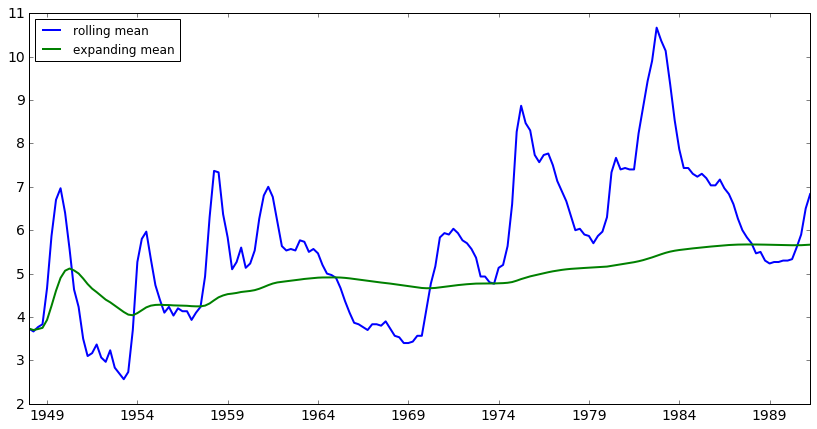

In [19]:
date_ticks = unemp.index.to_timestamp()

rolling_mean = unemp.unemployment_rate.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = unemp.unemployment_rate.resample('Q').sum().expanding().mean()

plt.figure(figsize=(14,7))

plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='rolling mean')
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='expanding mean')

plt.legend(loc='upper left')

plt.tick_params(labelsize=14)

### 6) Calculate and plot the exponentially weighted sum along with the rolling sum.

In [20]:
rolling_mean = unemp.unemployment_rate.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = unemp.unemployment_rate.resample('Q').sum().ewm(span=10).mean()

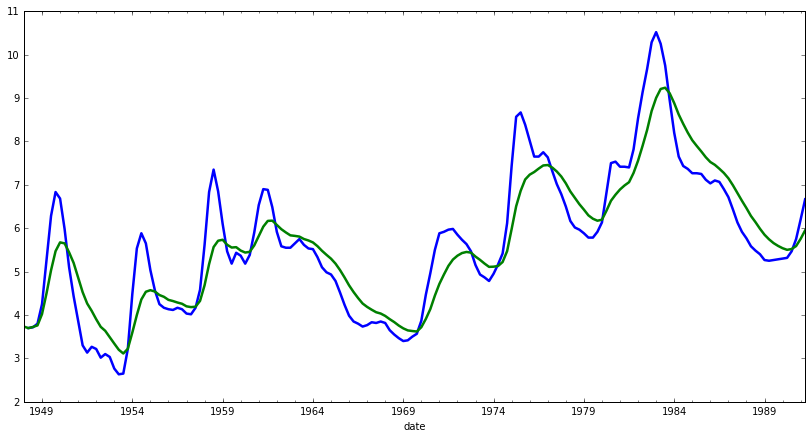

In [21]:
ax = rolling_mean.plot(lw=2.5, figsize=(14,7))
exp_weighted_mean.plot(ax=ax, lw=2.5)

### 7) Difference the unemployment rate and plot.

In [24]:
unemp['unemp_diff'] = unemp['unemployment_rate'].diff()

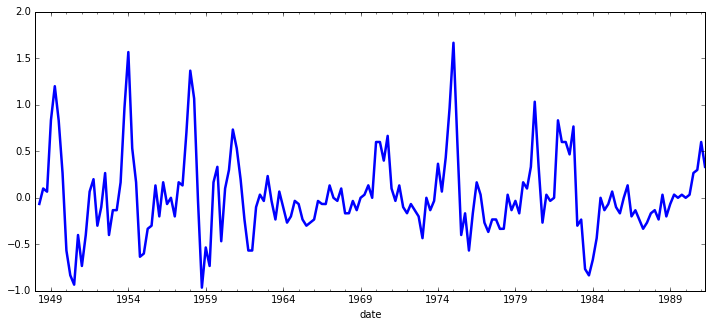

In [23]:
unemp['unemp_diff'].plot(lw=2.5, figsize=(12,5))